In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
bmw = pd.read_csv('./bmw.csv')

In [3]:
# Clean data
bmw = bmw.dropna()
bmw.head()

,Vehicle Name,Trip Started,Trip Ended,Trip Distance,Trip Duration,AverageMPG,Fuel Cost,Fuel Vol (gal),Hard Brake,Hard Accel,>70 MPH,>75 MPH,>80 MPH,Trip Map,Start Lon,Start Lat,Start Map,End Lat,End Lon,End Map
0,BMW 328i,"May 01, 2014 at 09:36AM","May 01, 2014 at 09:44AM",2.11,0:07,16.55,$0.48,0.13,1.0,0.0,0.0,0.0,0.0,http://ift.tt/1nLXuuE,-77.524838,38.995414,http://ift.tt/1rIQgoT,-77.476153,39.004031,http://ift.tt/1rIQgoX
1,BMW 328i,"May 01, 2014 at 09:44AM","May 01, 2014 at 10:08AM",7.86,0:24,21.25,$1.39,0.37,0.0,1.0,0.0,0.0,0.0,http://ift.tt/1nM2waH,-77.476153,39.004031,http://ift.tt/1rIQgoX,-77.395742,38.955988,http://ift.tt/1isEv2i
2,BMW 328i,"May 01, 2014 at 05:51PM","May 01, 2014 at 06:34PM",14.35,0:42,20.38,$2.50,0.66,1.0,0.0,0.0,0.0,0.0,http://ift.tt/1nNR5PL,-77.395742,38.955988,http://ift.tt/1isEv2i,-77.524838,38.995414,http://ift.tt/1rIQgoT
3,BMW 328i,"May 01, 2014 at 06:45PM","May 01, 2014 at 06:52PM",1.55,0:07,13.49,$0.42,0.11,0.0,1.0,0.0,0.0,0.0,http://ift.tt/1i3lsJY,-77.524838,38.995414,http://ift.tt/1rIQgoT,-77.537084,38.985018,http://ift.tt/1iOUif3
4,BMW 328i,"May 01, 2014 at 08:00PM","May 01, 2014 at 08:07PM",1.65,0:07,13.37,$0.46,0.12,0.0,1.0,0.0,0.0,0.0,http://ift.tt/1nO4mYl,-77.537084,38.985018,http://ift.tt/1iOUif3,-77.524838,38.995414,http://ift.tt/1rIQgoT


In [4]:
# Put dates in date type
bmw['Trip Started'] = bmw['Trip Started'].astype('datetime64')
bmw['Trip Ended'] = bmw['Trip Started'].astype('datetime64')

<AxesSubplot:title={'center':'Cars rent per month only'}, xlabel='Month', ylabel='Number of rent'>

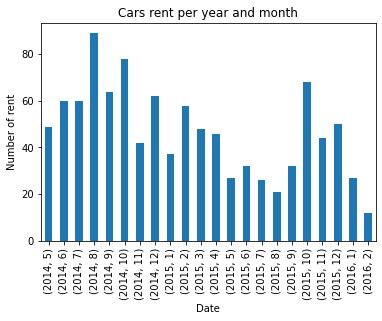

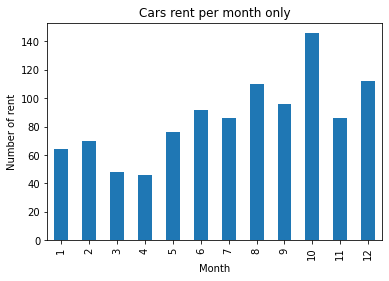

In [6]:
# Get renting tendencies
plt.figure()
bmw_per_ym = bmw.groupby([bmw['Trip Started'].dt.year,bmw['Trip Started'].dt.month]).count()
bmw_per_ym['Trip Started'].plot.bar(title="Cars rent per year and month", xlabel='Date', ylabel='Number of rent')

plt.figure()
bmw_per_m = bmw.groupby(bmw['Trip Started'].dt.month).count()
bmw_per_m['Trip Started'].plot.bar(title="Cars rent per month only", xlabel='Month', ylabel='Number of rent')

# More rent in October : we should increase the offer at this period (as an example)

In [6]:
# Get renting time stats
bmw['Trip Duration'] = bmw['Trip Duration'].astype('datetime64')
bmw_time_minutes = bmw['Trip Duration'].dt.hour*60 + bmw['Trip Duration'].dt.minute
print(f"Min renting time in minutes : {round(bmw_time_minutes.min(),1)}")
print(f"Mean renting time in minutes : {round(bmw_time_minutes.mean(),1)}")
print(f"Max renting time in minutes : {round(bmw_time_minutes.max(),1)}")

# High variancy

Min renting time in minutes : 0
Mean renting time in minutes : 17.6
Max renting time in minutes : 237


In [7]:
# Get renting travel distance stats
bmw['Trip Distance'].describe()

count    1032.000000
mean        7.075736
std         9.413802
min         0.010000
25%         0.927500
50%         6.885000
75%        11.350000
max       209.800000
Name: Trip Distance, dtype: float64

Text(0.5, 1.0, 'Relation between Trip Distance and Duration')

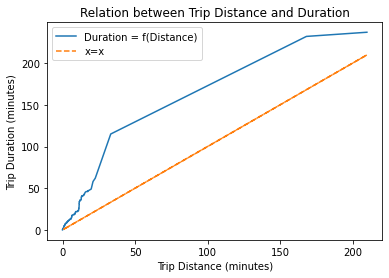

In [8]:
# Getting correlation with Duration
plt.plot(bmw['Trip Distance'].sort_values(), bmw_time_minutes.sort_values(), label='Duration = f(Distance)')
plt.plot(bmw['Trip Distance'],bmw['Trip Distance'], '--', label='x=x')
plt.xlabel('Trip Distance (minutes)')
plt.ylabel('Trip Duration (minutes)')
plt.legend()
plt.title('Relation between Trip Distance and Duration')

# The trip duration is relatively longer for medium distances : we should prior medium durations